# Plots for 01450 project 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_excel("Real estate valuation data set.xlsx")
df = df.drop(['No'], axis=1)
columns = df.columns

In [47]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [2]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


Get the date ready:

In [3]:
raw_data = np.array(df)
X = raw_data[:, 0:6]  # get rid of the last column Y
N,M = np.shape(X)

Y = X - np.ones((N,1))*X.mean(axis=0)
Y = Y * (1/np.std(Y,0))

U,S,Vh = np.linalg.svd(Y)
V = Vh.T
Z = Y @ V # project the standardized data onto the PC
print(S); print(V)

[33.27460658 20.8236055  20.17307834 15.70115729 15.08453554  7.8838676 ]
[[ 0.02117485 -0.63613192  0.75583245 -0.14844384  0.01015258 -0.03829461]
 [-0.00453492 -0.72789271 -0.65308312 -0.19939888  0.06106143 -0.01206935]
 [ 0.57055718 -0.07930835 -0.00162155  0.20354324 -0.10048217  0.78526782]
 [-0.461127   -0.11283464 -0.01947253  0.22024236 -0.83685361  0.15943771]
 [-0.44909709 -0.16500929  0.01479115  0.70284039  0.49059048  0.19026646]
 [-0.50957753  0.13877629  0.03998955 -0.59521707  0.21229407  0.56579201]]


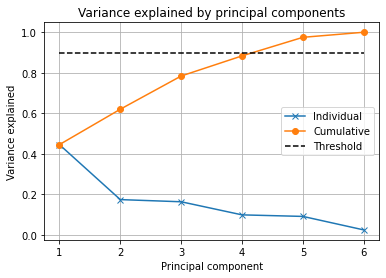

[0.44573247 0.17456624 0.16382975 0.09924571 0.09160355 0.02502229]


In [4]:
rho = (S*S) / (S*S).sum();threshold = 0.9

plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component'); plt.ylabel('Variance explained')
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()
print(rho)

In [6]:
conditions = [
    df['Y house price of unit area'] <= 27.7,
    (df['Y house price of unit area'] > 27.7) & (df['Y house price of unit area'] <= 46.6),
    df['Y house price of unit area'] > 46.6]
outputs = ['Low Price', 'Medium Price', 'High Price']
label = np.select(conditions, outputs)
classdict = dict(zip(outputs, [0,1,2]))
y = np.asarray([classdict[value] for value in label])

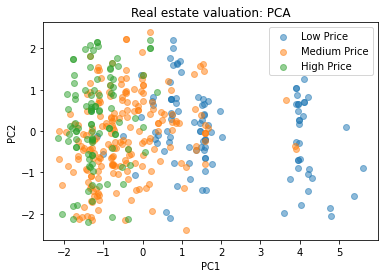

In [18]:
i=0; j=1; k=2  # select the PC that we want to plot
plt.figure()
for c in range(3):
     class_mask = y==c
     plt.scatter(Z[class_mask,i], Z[class_mask,j], alpha=0.5)
plt.title('Real estate valuation: PCA')
plt.legend(outputs)
plt.xlabel('PC%s'%(i+1))
plt.ylabel('PC%s'%(j+1))
plt.show()

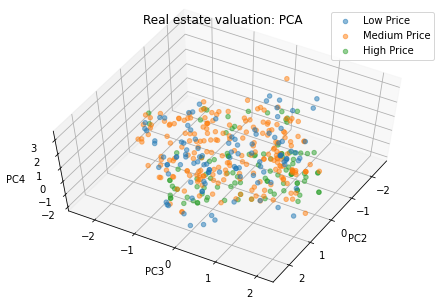

In [7]:
i=1; j=2; k=3  # select the PC that we want to plot
fig = plt.figure()
ax = Axes3D(fig,azim = 30, elev = 60)
for c in range(3):
     class_mask = y==c
     ax.scatter(Z[class_mask,i], Z[class_mask,j], Z[class_mask,k], alpha=0.5)
plt.title('Real estate valuation: PCA')
plt.legend(outputs)
ax.set_xlabel('PC%s'%(i+1))
ax.set_ylabel('PC%s'%(j+1))
ax.set_zlabel('PC%s'%(k+1))
plt.show()

In [53]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

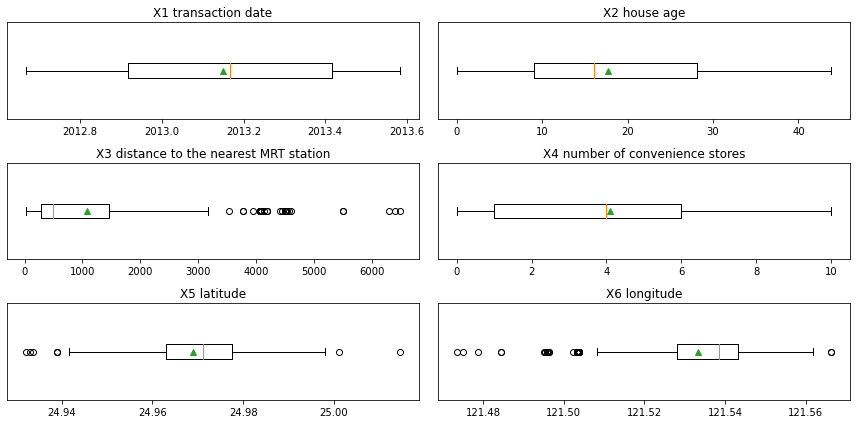

In [54]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,6))
for i, ax in enumerate(axes.flatten()):
    attr = columns[i]
    ax.boxplot(df['%s'%attr],vert=False,showmeans=True)
    ax.set_title(attr)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis='y', length=0)
fig.tight_layout() 

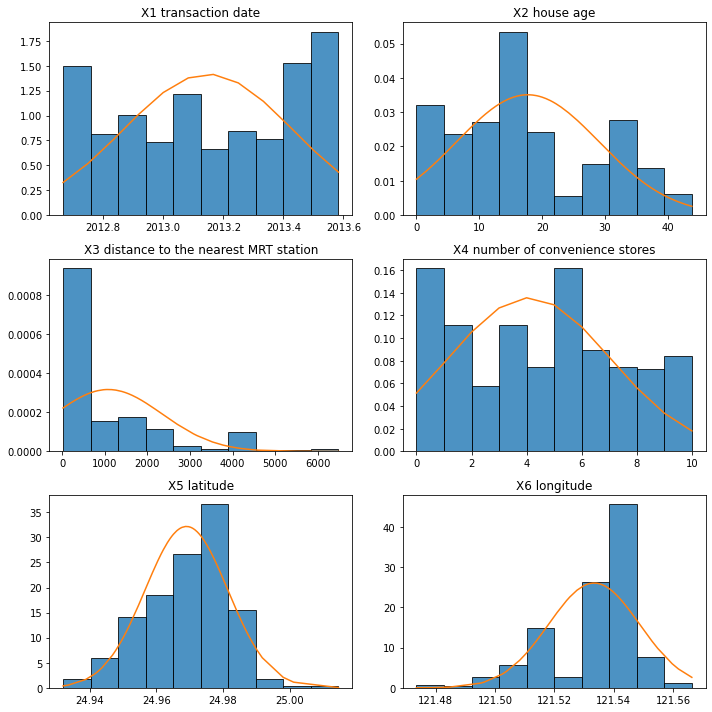

In [2]:
figs, axes = plt.subplots(nrows=3,ncols=2,figsize=(10,10))
for i,ax in enumerate(axes.flatten()):
    attr = columns[i]
    x = sorted(df['%s'%attr])
    mean, std = stats.norm.fit(x)
    ax.hist(x, density=True, alpha=0.8, edgecolor='black')
    ax.plot(x, stats.norm.pdf(x,mean,std), linewidth=1.5)
    ax.set_title('%s'%attr)
plt.tight_layout()
plt.show()

  We create the density plots to check if our six attributes appear to be normal distributed. For X1 transaction date, it basically correspond to normal distribution, except for a relatively larger ratio on both ends. For X5 latitude, it can be regarded as a perfect normal distribution, and X6 longitude is very close to normal distribution.
  As for X2 house age, X3 distance to the nearest MRT station and X4 number for convenience stores, they are not very close to normal distribution, because they have a too large ratio for lower values, especially X3 distance to the nearest MRT station. This may because people prefer the houses nearby the station, so most of the house are built within lkm around the station. Same reason for X2 house age, 'younger' houses are more welcomed by the market, so the data is mostly concentrated in the front part.

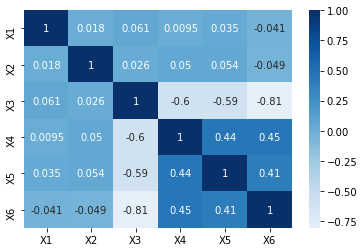

In [24]:
import seaborn as sns
df_corr = df
df_corr = df.drop(['Y house price of unit area'],axis=1)
df_corr = df_corr.rename(columns={"X1 transaction date":"X1", "X2 house age":"X2", "X3 distance to the nearest MRT station":'X3', "X4 number of convenience stores":'X4', 'X5 latitude':'X5', 'X6 longitude':'X6'})
corr = df_corr.corr()
sns.heatmap(corr, cmap='Blues', annot=True, center=0)
#sns.heatmap(corr, center=0, annot=False, vmax=1, vmin=-1, robust=True)
#corr.style.background_gradient(cmap, axis=1)